# Лабораторная работа №3
## 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

1. Id number: Идентификационный номер (Удален из csv файла)
2. RI - refractive index: Показатель преломления
3. Na - Sodium: Натрий
4. Mg - Magnesium: Магний
5. Al - Aluminum: Алюминий
6. Si - Silicon: Кремний
7. K - Potassium: Калий
8. Ca - Calcium: Кальций
9. Ba - Barium: Барий
10. Fe - Iron: Железо
11. Type of glass: Тип стекла

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn as sk
import copy
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  precision_recall_curve, average_precision_score, plot_precision_recall_curve, plot_roc_curve
%matplotlib inline
import seaborn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import warnings
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

In [2]:
df_orig= pd.read_csv('glass.csv')
df=copy.copy(df_orig)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## 2.	Удалите дубликаты строк в наборе данных

In [3]:
df.shape

(214, 10)

In [4]:
df.drop_duplicates().shape

(213, 10)

## 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая).

[Text(0, 0, 'building_windows_float_processed'),
 Text(1, 0, 'building_windows_non_float_processed'),
 Text(2, 0, 'vehicle_windows_float_processed'),
 Text(3, 0, 'containers'),
 Text(4, 0, 'tableware'),
 Text(5, 0, 'headlamps')]

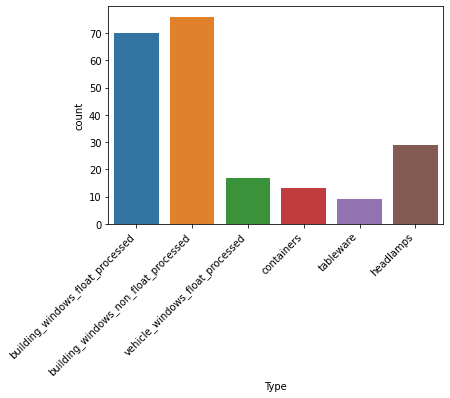

In [5]:
chart = sns.barplot(data=pd.DataFrame({
    'count': [len(df.loc[df["Type"] == 1]),
              len(df.loc[df["Type"] == 2]),
              len(df.loc[df["Type"] == 3]),
              len(df.loc[df["Type"] == 5]),
              len(df.loc[df["Type"] == 6]),
              len(df.loc[df["Type"] == 7]),],
    'Type': ['building_windows_float_processed',
             'building_windows_non_float_processed',
             'vehicle_windows_float_processed',
             'containers',
             'tableware',
             'headlamps'],}),
     y='count', x='Type')
gdf=df
df1=df
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [6]:
df=df.loc[(df.Type != 1) | (df.Type.index > 35)]
df.reset_index(drop = True, inplace = True)

df=df.loc[(df.Type != 2) | (df.Type.index > 80)]
df.reset_index(drop = True, inplace = True)

df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.0,1
1,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,0.00,0.0,1
2,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.0,1
3,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.0,1
4,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
126,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
127,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
128,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
129,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


[Text(0, 0, 'building_windows_float_processed'),
 Text(1, 0, 'building_windows_non_float_processed'),
 Text(2, 0, 'vehicle_windows_float_processed'),
 Text(3, 0, 'containers'),
 Text(4, 0, 'tableware'),
 Text(5, 0, 'headlamps')]

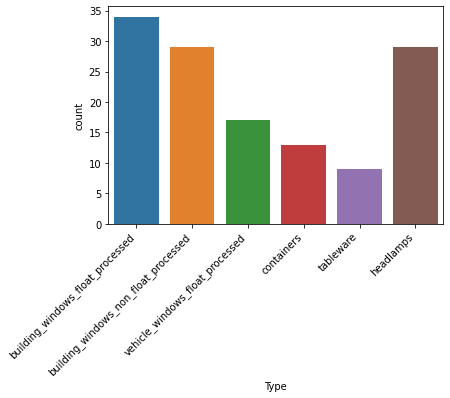

In [7]:
chart = sns.barplot(data=pd.DataFrame({
    'count': [len(df.loc[df["Type"] == 1]),
              len(df.loc[df["Type"] == 2]),
              len(df.loc[df["Type"] == 3]),
              len(df.loc[df["Type"] == 5]),
              len(df.loc[df["Type"] == 6]),
              len(df.loc[df["Type"] == 7]),],
    'Type': ['building_windows_float_processed',
             'building_windows_non_float_processed',
             'vehicle_windows_float_processed',
             'containers',
             'tableware',
             'headlamps'],}),
     y='count', x='Type')
gdf=df
df1=df
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [8]:
df.loc[df.Type == 1, 'Type'] = 0
df.loc[df.Type == 2, 'Type'] = 1
df.loc[df.Type == 3, 'Type'] = 2
df.loc[df.Type == 5, 'Type'] = 3
df.loc[df.Type == 6, 'Type'] = 4
df.loc[df.Type == 7, 'Type'] = 5

## 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. 

In [9]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,1.518389,13.625267,2.373282,1.512748,72.602519,0.491756,8.971298,0.259313,0.055267,2.160305
std,0.002686,0.820887,1.558461,0.575482,0.811748,0.816029,1.188480,0.557780,0.099153,1.904718
min,1.511150,11.030000,0.000000,0.340000,69.890000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516655,13.085000,0.000000,1.190000,72.180000,0.080000,8.395000,0.000000,0.000000,0.000000
50%,1.517970,13.490000,3.370000,1.400000,72.720000,0.510000,8.780000,0.000000,0.000000,2.000000
75%,1.520070,14.145000,3.600000,1.795000,73.025000,0.590000,9.570000,0.075000,0.090000,4.000000
max,1.526670,17.380000,3.980000,3.500000,75.410000,6.210000,13.440000,2.880000,0.510000,5.000000


In [10]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.0,0
1,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,0.00,0.0,0
2,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.0,0
3,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.0,0
4,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.00,0.0,0


<AxesSubplot:>

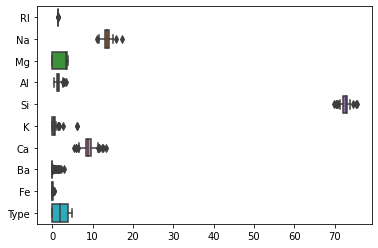

In [11]:
numerical = [c for c in gdf.columns if gdf[c].dtype.name != 'object']
sns.boxplot(data=gdf[numerical], orient = 'h')

BoxPlot после масштабирования:


<AxesSubplot:>

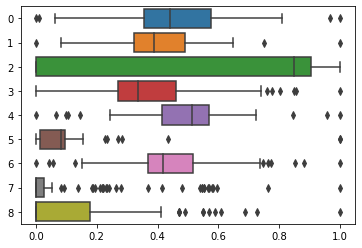

In [12]:
Scaling = df.drop('Type', axis = 1)
scaler = MinMaxScaler()
scaler.fit(Scaling) 
Scaling = scaler.transform(Scaling) 
print('BoxPlot после масштабирования:')
seaborn.boxplot(data = Scaling, orient = 'h')

## 5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены.

In [13]:
categorical_columns = [i for i in gdf.columns if gdf[i].dtype.name == 'Type']
numerical_columns = [i for i in gdf.columns if gdf[i].dtype.name != 'Type']
print('Категориальные признаки:')
print(categorical_columns)
print('Количественные признаки:')
print(numerical_columns)

Категориальные признаки:
[]
Количественные признаки:
['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']


Категориальные признаки отсутствуют

## 6. Оцените корреляцию между признаками и удалите те признаки, которые коррелируют с наибольшим числом других .

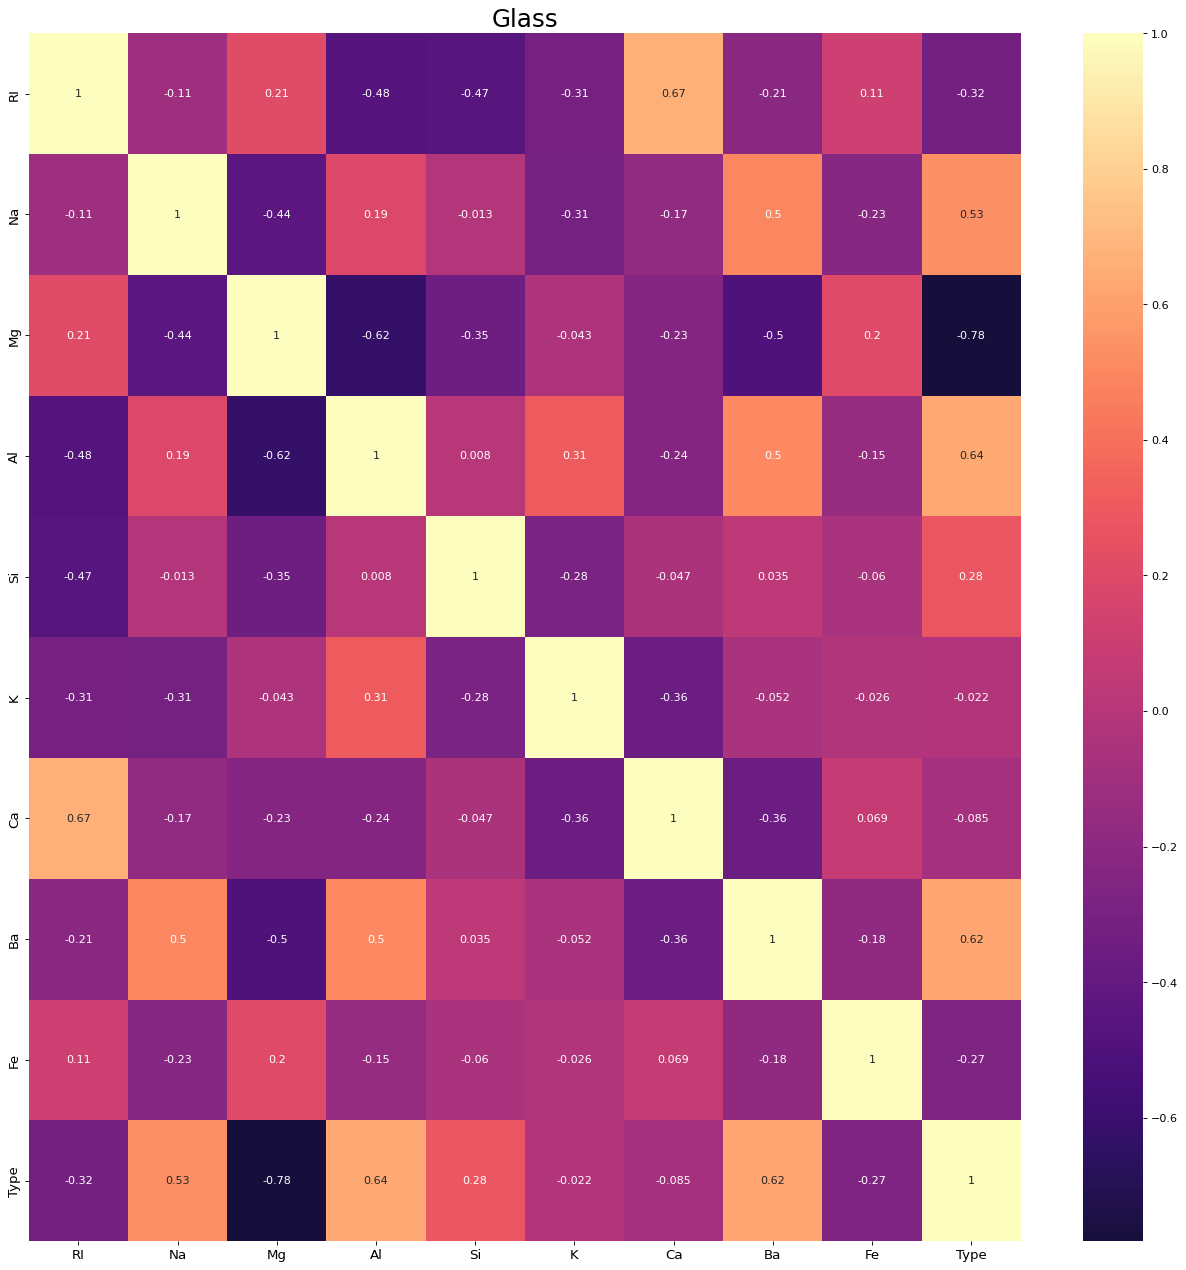

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.111501,0.213442,-0.477831,-0.467730,-0.307145,0.669602,-0.211660,0.111384,-0.321637
Na,-0.111501,1.000000,-0.440625,0.190135,-0.013479,-0.313616,-0.171641,0.495281,-0.231595,0.527885
Mg,0.213442,-0.440625,1.000000,-0.623651,-0.345152,-0.043308,-0.232680,-0.498184,0.200008,-0.782281
Al,-0.477831,0.190135,-0.623651,1.000000,0.008034,0.309985,-0.239240,0.503320,-0.149436,0.637853
Si,-0.467730,-0.013479,-0.345152,0.008034,1.000000,-0.282727,-0.047015,0.035331,-0.059860,0.282225
K,-0.307145,-0.313616,-0.043308,0.309985,-0.282727,1.000000,-0.363570,-0.051673,-0.026279,-0.022107
Ca,0.669602,-0.171641,-0.232680,-0.239240,-0.047015,-0.363570,1.000000,-0.360854,0.068698,-0.084875
Ba,-0.211660,0.495281,-0.498184,0.503320,0.035331,-0.051673,-0.360854,1.000000,-0.177132,0.618725
Fe,0.111384,-0.231595,0.200008,-0.149436,-0.059860,-0.026279,0.068698,-0.177132,1.000000,-0.268032
Type,-0.321637,0.527885,-0.782281,0.637853,0.282225,-0.022107,-0.084875,0.618725,-0.268032,1.000000


In [14]:
plt.figure(figsize=(20,20), dpi= 80)
sns.heatmap(df.corr(),xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='magma', center=0, annot=True)


plt.title('Glass', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

df.corr()


## 7. Заполните пропущенные значения в данных.

In [15]:
df.count()

RI      131
Na      131
Mg      131
Al      131
Si      131
K       131
Ca      131
Ba      131
Fe      131
Type    131
dtype: int64

## 8. Решите поставленную задачу классификации в соответствии с заданием.

In [37]:
X = df.drop(columns=['Type'], axis=1)
y0 = df['Type']

y1 = label_binarize(y0, classes=[0,1,2,3,4,5])

n_classes = 6

X0_train, X0_test, y0_train, y0_test = train_test_split(X, y1, test_size = 0.3, random_state = 11)
            
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.4, random_state = 34)

In [17]:
p = Perceptron()
pclff = OneVsRestClassifier(p, n_jobs= -1)

parameters = {
    "estimator__max_iter":[x for x in range(1, 50)],
    "estimator__alpha":  np.linspace(0, 1, 20)[1:],
    "estimator__penalty":['l1', 'l2']}

model_tunning = GridSearchCV(pclff, param_grid = parameters, n_jobs = -1)
model_tunning.fit(X1_train, y1_train)

print(model_tunning.best_score_)
print(model_tunning.best_params_)

0.3183333333333333
{'estimator__alpha': 0.10526315789473684, 'estimator__max_iter': 12, 'estimator__penalty': 'l1'}


In [24]:
ppn = Perceptron(alpha = 0.10526315789473684, max_iter = 12, penalty = 'l1')

pclf = OneVsRestClassifier(ppn, n_jobs= -1)

y1_score = pclf.fit(X1_train, y1_train).decision_function(X1_test)

print(pclf.score(X1_test, y1_test))

0.4339622641509434


In [92]:
dtc = DecisionTreeClassifier()
dtclf = OneVsRestClassifier(dtc, n_jobs= -1)

params = {
    "estimator__max_depth": list(range(1,12)),
    "estimator__max_features"  : list(range(1,8))}


dtc_grid = GridSearchCV(dtclf, params)
dtc_grid.fit (X0_train, y0_train)

print(dtc_grid.best_params_)

{'estimator__max_depth': 10, 'estimator__max_features': 6}


In [98]:
dtc = DecisionTreeClassifier(max_depth = 10, max_features = 6)
dtclf = OneVsRestClassifier(dtc, n_jobs= -1)
dtclf.fit(X0_train, y0_train)
dtclf.score(X0_test, y0_test)

0.625

## 9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

In [94]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ =  roc_curve(y1_test[:, i], y1_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

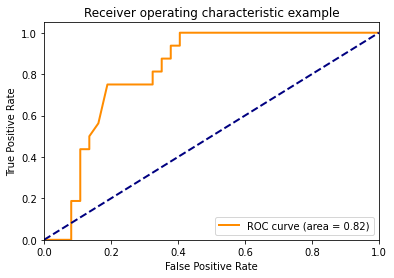

In [34]:
pnum = 0
plt.figure()
lw = 2
plt.plot(
    fpr[pnum],
    tpr[pnum],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[pnum],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

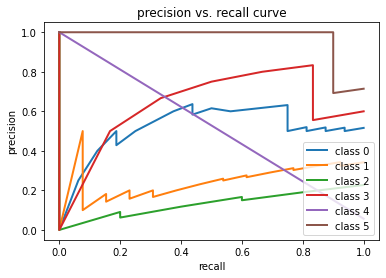

In [27]:
precision = dict()
recall = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y1_test[:, i], y1_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

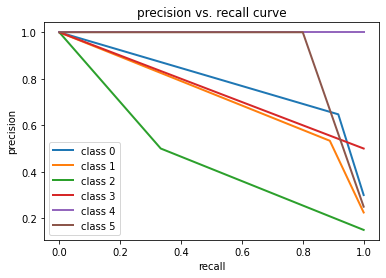

In [109]:
y_score = dtclf.predict_proba(X0_test)

precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y0_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

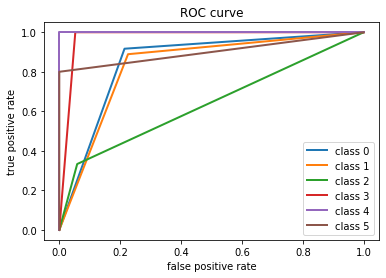

In [111]:
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y0_test[:, i],
                                  y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()